In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

%matplotlib inline

In [22]:
sub1 = pd.read_csv('../input/sub_058724.csv',index_col=0)
sub2 = pd.read_csv('../input/sub_057330.csv',index_col=0)
sub3 = pd.read_csv('../input/sub_060016.csv',index_col=0)

In [12]:
sub = 0.5*sub1 + 0.5*sub2

In [14]:
sub.reset_index(inplace=True)
sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_evaluation,0.549203,0.531174,0.525340,0.524438,0.565583,0.682668,0.665962,0.556160,0.532513,0.494929,0.501871,0.553102,0.647764,0.627365,0.511065,0.485863,0.476014,0.485303,0.535096,0.620696,0.604984,0.491429,0.477866,0.495769,0.477019,0.527207,0.624394,0.595931
1,FOODS_1_001_CA_1_validation,0.850751,0.729676,0.721737,0.667754,0.948209,1.017752,0.905417,0.883998,0.869726,0.955560,0.929619,1.011643,1.110510,1.135930,0.969562,0.838691,0.863600,0.897423,0.954468,1.229906,1.090252,0.948652,0.895303,0.908460,0.847646,1.012175,1.180785,1.074950
2,FOODS_1_001_CA_2_evaluation,0.616156,0.582824,0.587812,0.561875,0.613362,0.738510,0.722145,0.619823,0.589080,0.591409,0.598535,0.646889,0.774511,0.758658,0.611672,0.605359,0.593346,0.601365,0.658539,0.782604,0.745036,0.609966,0.530366,0.564902,0.510042,0.562653,0.665155,0.656311
3,FOODS_1_001_CA_2_validation,0.762699,0.807018,0.806097,0.858102,0.803699,0.857606,0.946933,0.738088,0.776827,0.784115,0.756503,0.819903,0.962438,0.869513,0.709193,0.681698,0.743500,0.700676,0.803389,0.900356,1.501148,0.989529,0.982485,0.964844,1.149449,1.183650,1.292737,1.339139
4,FOODS_1_001_CA_3_evaluation,0.579417,0.565830,0.573226,0.564331,0.603746,0.738614,0.743131,0.620261,0.601101,0.578996,0.588232,0.637151,0.756243,0.753085,0.598104,0.578812,0.565114,0.566713,0.637875,0.748104,0.694233,0.601730,0.527893,0.557615,0.501757,0.567426,0.689737,0.693789


In [16]:
sub.to_csv('../output/sub_blend.csv',index=False)

In [23]:
sub1=pd.melt(sub1,value_name='sub1')
sub2=pd.melt(sub2,value_name='sub2')
sub3=pd.melt(sub3,value_name='sub3')

In [24]:
sub = pd.concat([sub1,sub2,sub3],axis=1)

In [28]:
sub[['sub1','sub2','sub3']].corr()

,sub1,sub2,sub3
sub1,1.000000,0.647112,-0.003475
sub2,0.647112,1.000000,0.007276
sub3,-0.003475,0.007276,1.000000


In [31]:
sub1.sub1.max()

234.5143265569

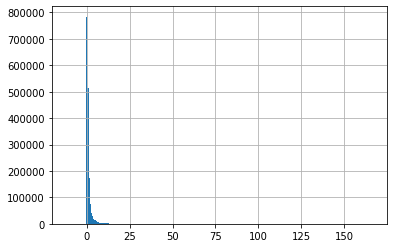

In [35]:
sub3.sub3.hist(bins=255)